In this project we create a ML model to predict the Pan Card provided by client is genune or fake, in this project we use open cv to implement this project.

### Get Images from user

In [4]:
from skimage.metrics import structural_similarity
import cv2
import requests
import imutils
from PIL import Image

In [6]:
!mkdir pancard_tamper
!mkdir pancard_tamper/images

In [9]:
original = Image.open(requests.get("https://static.india.com/wp-content/uploads/2022/01/noname-8.png",stream=True).raw)
tampered = Image.open(requests.get("https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png",stream=True).raw)

### Check for size and format of the image

In [10]:
print('Origninal image format : ', original.format)
print('Origninal image format : ', tampered.format)
print('Origninal image format : ', original.size)
print('Origninal image format : ', tampered.size)

Origninal image format :  JPEG
Origninal image format :  PNG
Origninal image format :  (1200, 800)
Origninal image format :  (282, 179)


### change Shape and sige of image

In [13]:
original = original.resize((250,160))
print(original.size)
original.save('pancard_tamper/images/original.png')
tampered = tampered.resize((250,160))
print(tampered.size)
tampered.save('pancard_tamper/images/tampered.png')

(250, 160)
(250, 160)


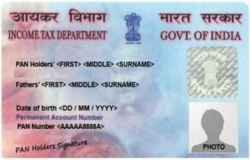

In [14]:
original

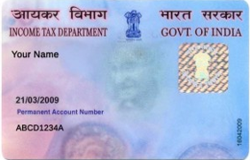

In [15]:
tampered

### convert the image to Grayscale

In [16]:
original = cv2.imread('/content/pancard_tamper/images/original.png')
tampered = cv2.imread('/content/pancard_tamper/images/tampered.png')

In [17]:
original_gray = cv2.cvtColor(original,cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered,cv2.COLOR_BGR2GRAY)

Converting colored image to grayscale using cv2 because colored images is comples as it have 3 channel which make hard to understand the features, by changing the image to greyscale the features detection can be analise easily.

### Finding the Similarity index of the index

In [18]:
(score, diff) = structural_similarity(original_gray,tampered_gray,full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.3399437179239256


Structural Similarity index help us to identify the similarity between two images, higher the score means original and lower the score is tampered.

### finding the Thresold of image

In [20]:
thresh = cv2.threshold(diff,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

Thresold is used to convert image into array format, this helps to perform mathematical operations easy.

### Finding countour and grab those countour using imutils

In [21]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

Contours are used to recoginition of shape and shape anaysis

### Draw a bounding Rectangle

In [22]:
for c in cnts:
  (x,y,w,h) = cv2.boundingRect(c)
  cv2.rectangle(original,(x,y),(x+w,y+h),(0,0,255),2)
  cv2.rectangle(tampered,(x,y),(x+w,y+h),(0,0,255),2)

Bounding rectangle help us to finding the ratio of height to width of object bounding rectangle, by this it will draw the bounding box on both original and tampered images and find the difference.

### Plot Difference, thresold, original or tampered

original image contours details


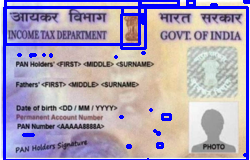

In [25]:
print('original image contours details')
Image.fromarray(original)

Tampered image contours details


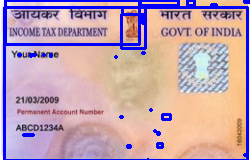

In [26]:
print('Tampered image contours details')
Image.fromarray(tampered)

by analysing contours we unable to identify any difference

difference between images


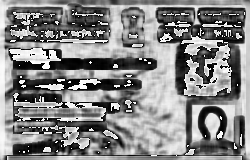

In [27]:
print('difference between images')
Image.fromarray(diff)

Thresold image difference


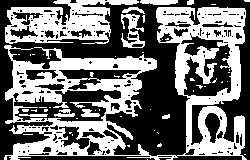

In [28]:
print('Thresold image difference')
Image.fromarray(thresh)

### Compare all similarity and Summary

By this analysis we understood that image provided by the customer is tampered not an original image, as we caluculate the image SSIM is about 33.99% we further more check the threshold, contours and bounding box analysis for confirmation the image is tampered or original.